# Gmail Smart Compose: Real-Time Assisted Writing

### What is Real-Time Assisted Writing ?

Writing assistant is a technique of Artificial Intelligence, that 
automates one or more phases in the process of generating content 
for marketing purposes. AI writing assistants can help with ideation, 
structure and even tone and style.


### What is Gmail Smart Compose ?

Gmail Smart Compose is a writing assistant software. It offers 
suggestions as you type. You can let Gmail help you write emails 
faster.


### Problem Description:

In this case study, my main task is to predict the next few 
sentences while writing an email based on the written words using 
Enron Email Dataset. 


### Data Description:

was collected and prepared by the CALO Project (A Cognitive Assistant that Learns and Organizes). It contains data from about 150 users, mostly senior management of Enron, organized into folders. The corpus contains a total of about 0.5M messages. This data was originally made public, and posted to the web, by the Federal Energy Regulatory Commission during its investigation.
The email dataset was later purchased by Leslie Kaelbling at MIT, and turned out to have a number of integrity problems. A number of folks at SRI, notably Melinda Gervasio, worked hard to correct these problems, and it is thanks to them (not me) that the dataset is available. The dataset here does not include attachments, and some messages have been deleted "as part of a redaction effort due to requests from affected employees". Invalid email addresses were converted to something of the form user@enron.com whenever possible (i.e., recipient is specified in some parse-able format like "Doe, John" or "Mary K. Smith") and to no_address@enron.com when no recipient was specified.

I get a number of questions about this corpus each week, which I am unable to answer, mostly because they deal with preparation issues and such that I just don't know about. If you ask me a question and I don't answer, please don't feel slighted.

I am distributing this dataset as a resource for researchers who are interested in improving current email tools, or understanding how email is currently used. This data is valuable; to my knowledge it is the only substantial collection of "real" email that is public. The reason other datasets are not public is because of privacy concerns. In using this dataset, please be sensitive to the privacy of the people involved (and remember that many of these people were certainly not involved in any of the actions which precipitated the investigation.)

Prior versions of the dataset are no longer being distributed. If you are using the March 2, 2004 Version; the August 21, 2009 Version; or the April 2, 2011 Version of this dataset for your work, you are requested to replace it with the newer version of the dataset below, or make the the appropriate changes to your local copy.
May 7, 2015 Version of dataset (about 1.7Gb, tarred and gzipped).
There are also several on-line databases that allow you to search the data, at UCB, and www.enron-mail.com


##### reference:

* https://www.cs.cmu.edu/~enron/


* https://arxiv.org/pdf/1906.00080.pdf

### Task Description:

My main task is to predict the next few 
sentences while writing an email based on the written words using 
Enron Email Dataset. 


### Performance Metrics:
1. Train loss and validation loss

2. Bleu Score

### Notebook Content: 

1. EDA_and_Preprocessing_v.1 -> I have done all the Data Cleaning, Data Preprocessing and Exploratory Data Analysis part in
this notebook.

##  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import email
import re

from nltk.tokenize import sent_tokenize
from bs4 import BeautifulSoup
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

### Extract data from main directory

In [2]:
# Read text File
def read_text_file(file_path):
   
    with open(file_path,'r') as f:
        file = f.read()
    return(file)




def create_csv_file(directoryPath):
    
    # Find all the files location
    all_csv_files = []
    
    
    for path, subdirs, files in os.walk(directoryPath):
        for name in files:
            all_csv_files.append(os.path.join(path, name))
            
            
    # Store the extracted text data to the list
    List_files= []
    
    for file in all_csv_files:
        read_file = read_text_file(file)
        List_files.append(read_file)
        
    # Store the data into dataframe
    df = pd.DataFrame(
    {'file': all_csv_files,
     'message': List_files
    })

        
    return df

In [3]:
directoryPath = "maildir"

df=create_csv_file(directoryPath)

In [4]:
#check no. of rows and columns present in dataframe

df.head()

file  \
0    maildir\allen-p\all_documents\1   
1   maildir\allen-p\all_documents\10   
2  maildir\allen-p\all_documents\100   
3  maildir\allen-p\all_documents\101   
4  maildir\allen-p\all_documents\102   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [5]:
#check no. of rows and columns present in dataframe

df.shape

(517401, 2)

In [6]:
# check the columns of the dataframe

df.columns

Index(['file', 'message'], dtype='object')

In [7]:
# saving the dataframe into csv file

df.to_csv('message.csv' ,  index=False) 

### Data for Exploratory Data Analysis 

In [2]:
#Read the dataset

data = pd.read_csv('message.csv')

In [3]:
#Check no. of rows and columns present in dataframe

data.shape

(517401, 2)

In [4]:
#Viewing top 5 results

data.head()

file  \
0    maildir\allen-p\all_documents\1   
1   maildir\allen-p\all_documents\10   
2  maildir\allen-p\all_documents\100   
3  maildir\allen-p\all_documents\101   
4  maildir\allen-p\all_documents\102   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [5]:
# Used to print the summary of a DataFrame, like datatype of the features, usage memory

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [6]:
# Check the null values is present or not

data.isnull().sum()

file       0
message    0
dtype: int64

In [7]:
# Viewing one of the messages in the message column

print(data.message[0])

Message-ID: <29790972.1075855665306.JavaMail.evans@thyme>
Date: Wed, 13 Dec 2000 18:41:00 -0800 (PST)
From: 1.11913372.-2@multexinvestornetwork.com
To: pallen@enron.com
Subject: December 14, 2000 - Bear Stearns' predictions for telecom in Latin
 America
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Multex Investor <1.11913372.-2@multexinvestornetwork.com>
X-To: <pallen@enron.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

In today's Daily Update you'll find free reports on
America Online (AOL), Divine Interventures (DVIN),
and 3M (MMM); reports on the broadband space, Latin
American telecom, and more.

For free research, editor's picks, and more come to the Daily Investor:
http://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&d=20001214#
investor

***************************************************************
You are receiving this mail because

In [8]:
def get_body(df):
    
    """
    
    To extract the body part from the message column
    
    """
    body=[]
    
    for i in df['message'].values:
        data=email.message_from_string(i).get_payload()
        body.append(data)
    
    return body    

In [9]:
#taking new dataframe
df = pd.DataFrame()

# Extract the body into new dataframe
df['body'] = get_body(data)

In [10]:
def get_other_features(feature, df):
    
    """
    
    To extract the other necessary features from the message column other than the body
    
    """
    
    fields = [email.message_from_string(x).get(feature) for x in df['message'].values]
    
    return fields

In [11]:
# extracting 5 features (Message-ID: , Date: , From: , To: , Subject:)

df['Message-ID'] = get_other_features('Message-ID', data)
df['Date'] = get_other_features('Date', data)
df['Subject'] = get_other_features('Subject', data)
df['From'] = get_other_features('X-From', data)
df['To'] = get_other_features('X-To', data)

In [12]:
df.head(1)

body  \
0  In today's Daily Update you'll find free reports on\nAmerica Online (AOL), Divine Interventures (DVIN),\nand 3M (MMM); reports on the broadband space, Latin\nAmerican telecom, and more.\n\nFor free research, editor's picks, and more come to the Daily Investor:\nhttp://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&d=20001214#\ninvestor\n\n***************************************************************\nYou are receiving this mail because you have registered for\nMultex Investor. To unsubscribe, see bottom of this message.\n***************************************************************\n\n======================== Sponsored by =========================\nWould you own just the energy stocks in the S&P 500?\nSelect Sector SPDRs divides the S&P 500 into nine sector index funds.\nPick and choose just the pieces of the S&P 500 you like best.\nhttp://www.spdrindex.com\n===============================================================\n\nFeatured in today's edition of the Daily Update:\n\n1. SPECIAL ANNOUNCEMENT: Treat yourself to Multex Investor's NEW Personal\nFinance Channel to take advantage of top-notch content and tools  FREE.\n\n2. DAILY FREE SPONSOR REPORT: Robertson Stephens maintains a "buy" rating\non Divine Interventures (DVIN).\n\n3. FREE RESEARCH REPORT: Jefferies & Co. rates America Online (AOL) a\n"buy," saying projected growth remains in place.\n\n4. ASK THE ANALYST: Morgan Stanley Dean Witter's Lew Smith in the Analyst\nCorner\n\n5. HOT REPORT: Oscar Gruss & Son's most recent issue of its Broadband\nBrief reports the latest developments in the broadband space.\n\n6. EDITOR'S PICK: Bear Stearns measures the impact of broadband and the\nInternet on telecom in Latin America.\n\n7. FREE STOCK SNAPSHOT: The current analysts' consensus rates 3M (MMM), a\n"buy/hold."\n\n8. JOIN THE MARKETBUZZ: where top financial industry professionals answer\nyour questions and offer insights every market day from noon 'til 2:00\np.m. ET.\n\n9. TRANSCRIPTS FROM WALL STREET: Ash Rajan, senior vice president and\nmarket analyst with Prudential Securities, answers questions about the\nmarket.\n\n======================== Sponsored by =========================\nProfit From AAII's "Cash Rich" Stock Screen - 46% YTD Return\n\nWith so much market volatility, how did AAII's "Cash Rich"\nStock Screen achieve such stellar returns?  Find the answer by\ntaking a free trial membership from the American Association\nof Individual Investors and using our FREE Stock Screen service at:\nhttp://subs.aaii.com/c/go/XAAI/MTEX1B-aaiitU1?s=S900\n===============================================================\n\n1. NEW ON MULTEX INVESTOR\nTake charge of your personal finances\n\nDo you have endless hours of free time to keep your financial house in\norder? We didn't think so. That's why you need to treat yourself to Multex\nInvestor's NEW Personal Finance Channel to take advantage of top-notch\ncontent and tools  FREE.\nClick here for more information.\nhttp://www.multexpf.com?mktg=sgpftx4&promo=unl&t=10&d=20001214\n\n\n2. DAILY FREE SPONSOR REPORT\nDivine Interventures (DVIN)\n\nRobertson Stephens maintains a "buy" rating on Divine Interventures, an\nincubator focused on infrastructure services and business-to-business\n(B2B) exchanges. Register for Robertson Stephens' free-research trial to\naccess this report.\nClick here.\nhttp://www.multexinvestor.com/Download.asp?docid=5018549&sid=9&promo=unl&t=12&\nd=20001214\n\n\n3. FREE RESEARCH REPORT\nHold 'er steady -- America Online (AOL)\n\nAOL's projected growth and proposed merger with Time Warner (TWX) both\nremain in place, says Jefferies & Co., which maintains a "buy" rating on\nAOL. In the report, which is free for a limited time, analysts are\nconfident the deal will close soon.\nClick here.\nhttp://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&t=11&d=2000\n1214\n\n\n4. TODAY IN THE ANALYST CORNER\nFollowing market trends\n\nMorgan Stanley Dean Witter's Lew Smith sees strong

In [13]:
#check no. of rows and columns present in dataframe

df.shape

(517401, 6)

In [14]:
#check the name of columns present in dataframe

df.columns

Index(['body', 'Message-ID', 'Date', 'Subject', 'From', 'To'], dtype='object')

In [15]:
# Used to print the summary of a DataFrame, like datatype of the features, usage memory

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   body        517401 non-null  object
 1   Message-ID  517401 non-null  object
 2   Date        517401 non-null  object
 3   Subject     517401 non-null  object
 4   From        517372 non-null  object
 5   To          517372 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [16]:
# Changing the data type of the date column

df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [17]:
# Adding a few extra columns for EDA purpose

# day of the week
df.insert(1, 'day_of_week', df['Date'].dt.day_name())

# hour
df.insert(2, 'hour', df['Date'].dt.hour)

# year
df.insert(3, 'year', df['Date'].dt.year)

In [18]:
# Assigning the values of the date column to the dataframe index 

df.index = df.Date

In [19]:
df.head(5)

body  \
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [20]:
# Converting all text elements to lowercase

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype(str).str.lower().str.strip()

In [21]:
df.head(2)

body  \
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [22]:
# Sorting the dataframe by year column

df = df.sort_values(by=['year'])

In [23]:
# Removing NAN values from respective columns

df = df[df['Message-ID'] != '']
df = df[df['Date'] != '']
df = df[df['Subject'] != '']
df = df[df['From'] != '']
df = df[df['To'] != '']

In [24]:
#check no. of rows and columns present in dataframe

df.shape

(489264, 9)

In [25]:
df.head(1)

body  \
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [26]:
# Used to print the summary of a DataFrame, like datatype of the features, usage memory

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489264 entries, 1980-01-01 00:00:00+00:00 to 2044-01-02 23:46:00+00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   body         489264 non-null  object             
 1   day_of_week  489264 non-null  object             
 2   hour         489264 non-null  int64              
 3   year         489264 non-null  int64              
 4   Message-ID   489264 non-null  object             
 5   Date         489264 non-null  datetime64[ns, UTC]
 6   Subject      489264 non-null  object             
 7   From         489264 non-null  object             
 8   To           489264 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 37.3+ MB


In [27]:
#saving the dataframe into csv file

df.to_csv('EDA_data.csv' ,index=False)

### Exploratory Data Analysis

In [28]:
#Read the dataset

df = pd.read_csv('EDA_data.csv')

In [29]:
#check no. of rows and columns present in dataframe

df.shape

(489264, 9)

In [30]:
# Used to print the summary of a DataFrame, like datatype of the features, usage memory

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489264 entries, 0 to 489263
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   body         489264 non-null  object
 1   day_of_week  489264 non-null  object
 2   hour         489264 non-null  int64 
 3   year         489264 non-null  int64 
 4   Message-ID   489264 non-null  object
 5   Date         489264 non-null  object
 6   Subject      489264 non-null  object
 7   From         489236 non-null  object
 8   To           489236 non-null  object
dtypes: int64(2), object(7)
memory usage: 33.6+ MB


In [31]:
df.head()

body  \
0  will we ask for approval of the sale?  if so will we ask \n\n\n   \n\t\n\t\n\tfrom:  gary zahn                           11/27/2000 02:22 pm\n\t\n\nto: rod hayslett/fgt/enron@enron\ncc: bob chandler/et&s/enron@enron, james saunders/fgt/enron@enron \n\nsubject: re: asset divestiture approval  \n\nrod,  to my knowledge the commission has not specifically defined what is de \nminimus.   the working definition of an operating unit or system is taken \nfrom an office of the chief accountant interpretative letter issued  may 26, \n1961.  "the principal tests are amount of investment, character of the \nproperty acquired, and continuity of operation.  the following have been \ndeemed to be operating units or systems: a large compressor station, a \nprocessing plant, an important measuring station, a gathering system or \nimportant segment thereof,  a transmission line or important segment.  if the \ntransaction involves such a small amount of property as to be de minimus, it \nneed not be considered as an operating unit."  if a customer is attached to \nthe facilities to be sold it is considered prima facie evidence that the \nproperty is an operating unit or system.\n\nin a july 8, 1992, the nng rate department in an interoffice memorandum \nregarding the definition of an operating units or system noted "the \ncommission has not specifically defined de minimus, however, based on past \nrulings we can assume that the investment must be something less than $9 \nmillion, or a pipeline less than 7.586 miles."\n\nthe 1.091 miles of 6" pipe and faribault tbs #1 and the northfield 4" \nbranchlines of 4.9 miles and tbs have a net book value of $57,712. \n\nmy main concern, if we use the de minimus rationale, are we not setting a \nprecedent in which future sales or acquisitions will have to be viewed?  some \nof those future de minimus sales could involve gains! \n\nagain, it is not clear how the commission will make its determination.  the \ndownside, if the commission rejects our argument, nng will have a $ 58k loss \non the sale of these assets. \n\n\n\n\n\n\n\n\n\n\n\nrod hayslett\n\n11/27/2000 12:23 pm\nto: gary zahn/et&s/enron@enron\ncc: bob chandler/et&s/enron@enron, james saunders/fgt/enron@enron \n\nsubject: re: asset divestiture approval  \n\ni want to make sure of this.\n\n\n\n   \n\t\n\t\n\tfrom:  gary zahn                           11/27/2000 10:56 am\n\t\n\nto: bob chandler/et&s/enron@enron\ncc: rod hayslett/fgt/enron@enron, james saunders/fgt/enron@enron \n\nsubject: re: asset divestiture approval  \n\ni think an argument can be made that the amount is de minimus which leads to \na non-operating unit designation.   \n\n\n   \n\t\n\t\n\tfrom:  bob chandler                           11/21/2000 05:17 pm\n\t\n\nto: gary zahn/et&s/enron@enron\ncc: rod hayslett/fgt/enron@enron, james saunders/fgt/enron@enron \n\nsubject: asset divestiture approval\n\ngary:  are you ok with the non-operating unit assumption based on deminimus \nnbv?\nif you're ok with it and the lawyers are ok, then it must be ok for me.\n\nrod:  i don't have a clue why steve harris should have to sign off on this \nproject.\n---------------------- forwarded by bob chandler/et&s/enron on 11/21/2000 \n05:08 pm ---------------------------\n\nrod hayslett\n\n11/21/2000 05:06 pm\nto: bob chandler/et&s/enron@enron, james centilli/et&s/enron@enron, dave \nwaymire/et&s/enron@enron, james saunders/fgt/enron@enron\ncc:  \n\nsubject: asset divestiture approval\n\ncan anyone think of a reason why this should not be done or why the \nassumptions made here are not all 100% correct?   is there any risk on the \naccounting?   where is the contract for sale?\n\n\n---------------------- forwarded by rod hayslett/fgt/enron on 11/21/2000 \n05:04 pm ---------------------------\n\n\ndave waymire\n11/20/2000 12:35 pm\nto: danny mccarty/et&s/enron@enron, dave neubauer/et&s/enron@enron, rod \nhayslett/fgt/enron@enron, michel nelson/et&s/enron@enron, mike \nmcgowan/et&s/enron@enr

###   Comparison of the total numbers of Email has been transmitted in the year   

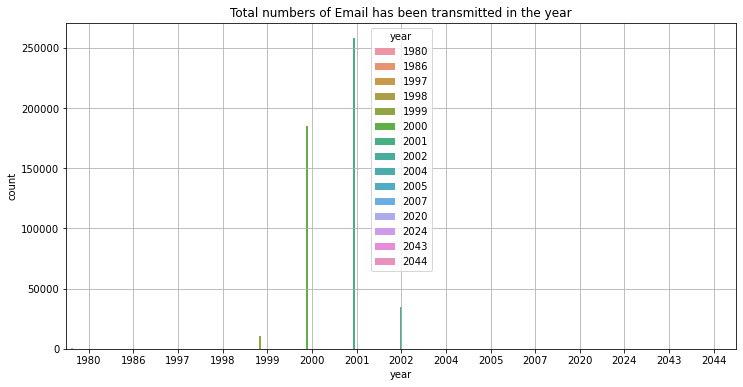

In [33]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'year' , data = df , hue = 'year')
plt.title("Total numbers of Email has been transmitted in the year")
plt.grid()
plt.show()

### Observation

* From the above plot we can see there are so many outliers. 

* From 1999 to 2002 range, the email transmission rate is very high. Especially in the year 2001.

### Comparison of the total number of Email has been transmitted in the week   

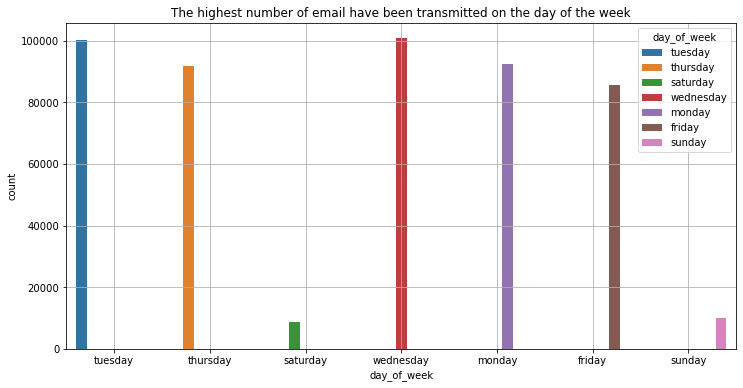

In [34]:
plt.subplots(figsize=(12,6))
sns.countplot(x = 'day_of_week' , data = df , hue = 'day_of_week')
plt.title("The highest number of email have been transmitted on the day of the week")
plt.grid()
plt.show()

### Observation

* Expect Saturday and Sunday, all the weekdays have the high email transmission rate

###  Analysis of Body feature

In [35]:
body_data = list(df['body'].apply(lambda x:len(x)))

Text(0, 0.5, 'Frequency')

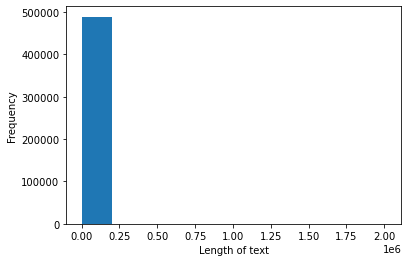

In [36]:
# EDA for text length
plt.hist(body_data)
plt.rcParams["figure.figsize"] = (10,4)
plt.xlabel("Length of text")
plt.ylabel("Frequency")

### Observation

* Can't get many ideas above the length of the text from the above plot, Let's reduce the range and try again 

In [37]:
for i in range(0,110,10):
    
    print("{}th- percentile value is {} \n".format(i,np.percentile(body_data, i)))
    
    print("**"*25)
    
print("*"*100)

for i in range(90,101,1):
    
    print("{}th- percentile value is {} \n".format(i,np.percentile(body_data, i)))
    
    print("**"*25)

0th- percentile value is 1.0 

**************************************************
10th- percentile value is 125.0 

**************************************************
20th- percentile value is 249.0 

**************************************************
30th- percentile value is 395.0 

**************************************************
40th- percentile value is 576.0 

**************************************************
50th- percentile value is 808.0 

**************************************************
60th- percentile value is 1108.0 

**************************************************
70th- percentile value is 1511.0 

**************************************************
80th- percentile value is 2191.0 

**************************************************
90th- percentile value is 3679.0 

**************************************************
100th- percentile value is 2011422.0 

**************************************************
***********************************************************

Text(0, 0.5, 'Frequency')

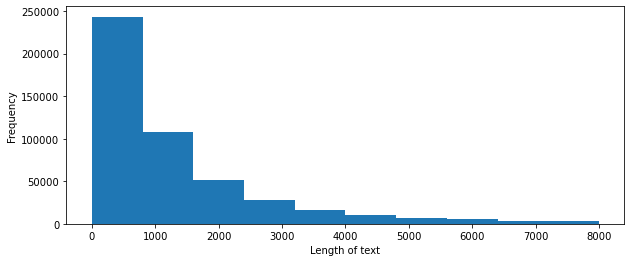

In [38]:
# EDA for text length
plt.hist(body_data,range=[1,8000])
plt.rcParams["figure.figsize"] = (10,4)
plt.xlabel("Length of text")
plt.ylabel("Frequency")

### Observation

* Majority of the text length is less than 4000. 

### wordcloud

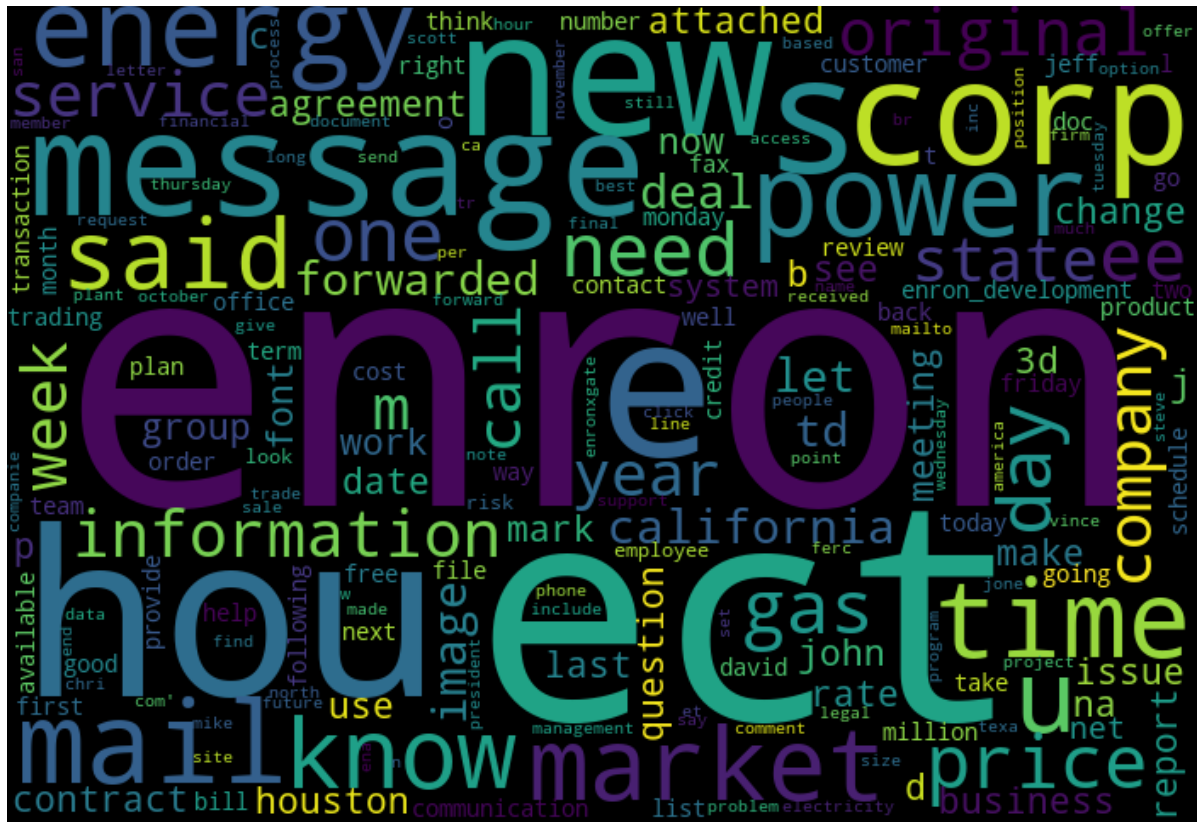

In [39]:
# Combining the subjects of all emails
text = ' '.join(map(str, df['body'].values))

# Displaying the frequency of words in the subjects
w_cloud = WordCloud(width=700, height=480, margin=0, collocations=False)

stopwords = ['re', 'fw', 'fwd', 'ga', 'ge', 'email', 'will', 'please',\
             'subject', 'thank', 'thanks', 'am', 'pm', 'kay',\
             'cc', 'sent', 'may', 'want']
for word in stopwords:
    w_cloud.stopwords.add(word)

wordcloud = w_cloud.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

Observation
-----------

* In the WordCloud representation, we can see a few words are coming in a large majority. 

## Overall Observation after Exploratory Data Analysis


* Although it's a word prediction assignment, so we will work only with the BODY features. The rest of the features we will consider for removing the NAN values and the outliers. 


* As per observation, we will allow only those sentences present in the BODY feature which has a length size of less than 4000. 

### Data preprocessing

In [2]:
#Read the dataset

data = pd.read_csv('message.csv')

In [3]:
data.head(1)

file  \
0  maildir\allen-p\all_documents\1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [4]:
#check no. of rows and columns present in dataframe

data.shape

(517401, 2)

In [5]:
# Used to print the summary of a DataFrame, like datatype of the features, usage memory

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [6]:
# Viewing one of the messages in the message column

print(data.message[0])

Message-ID: <29790972.1075855665306.JavaMail.evans@thyme>
Date: Wed, 13 Dec 2000 18:41:00 -0800 (PST)
From: 1.11913372.-2@multexinvestornetwork.com
To: pallen@enron.com
Subject: December 14, 2000 - Bear Stearns' predictions for telecom in Latin
 America
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Multex Investor <1.11913372.-2@multexinvestornetwork.com>
X-To: <pallen@enron.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

In today's Daily Update you'll find free reports on
America Online (AOL), Divine Interventures (DVIN),
and 3M (MMM); reports on the broadband space, Latin
American telecom, and more.

For free research, editor's picks, and more come to the Daily Investor:
http://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&d=20001214#
investor

***************************************************************
You are receiving this mail because

In [7]:
def clear_nan_rows(df, column, text, idx):
    
    """ 
    
    Drop rows from  dataframe  that do not contain specific text
    
    """
    
    rows = []
    
    for row, message in enumerate(column):
        message_words = message.split('\n')
        
        if text not in message_words[idx]:
            rows.append(row)
    
    df = df.drop(df.index[rows])
    
    return df

In [8]:
columns = ['Message-ID: ', 'Date: ', 'From: ', 'To: ', 'Subject: ']

for idx, text in enumerate(columns):
    data = clear_nan_rows(data, data.message, text, idx)
    
data = data.reset_index(drop=True)

In [9]:
#check no. of rows and columns present in dataframe

data.shape 

(405968, 2)

In [10]:
data.head()

file  \
0    maildir\allen-p\all_documents\1   
1  maildir\allen-p\all_documents\100   
2  maildir\allen-p\all_documents\101   
3  maildir\allen-p\all_documents\102   
4  maildir\allen-p\all_documents\103   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [11]:
def get_Body(df):
    
     """
    
    To extract the body part from the message column
    
    """
    
    body=[]
    
    for i in df['message'].values:
        data=email.message_from_string(i).get_payload()
        body.append(data)
    
    return body    

In [12]:
df = pd.DataFrame()

df['body'] = get_Body(data)

In [13]:
df.head(5)

body
0  In today's Daily Update you'll find free reports on\nAmerica Online (AOL), Divine Interventures (DVIN),\nand 3M (MMM); reports on the broadband space, Latin\nAmerican telecom, and more.\n\nFor free research, editor's picks, and more come to the Daily Investor:\nhttp://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&d=20001214#\ninvestor\n\n***************************************************************\nYou are receiving this mail because you have registered for\nMultex Investor. To unsubscribe, see bottom of this message.\n***************************************************************\n\n======================== Sponsored by =========================\nWould you own just the energy stocks in the S&P 500?\nSelect Sector SPDRs divides the S&P 500 into nine sector index funds.\nPick and choose just the pieces of the S&P 500 you like best.\nhttp://www.spdrindex.com\n===============================================================\n\nFeatured in today's edition of the Daily Update:\n\n1. SPECIAL ANNOUNCEMENT: Treat yourself to Multex Investor's NEW Personal\nFinance Channel to take advantage of top-notch content and tools  FREE.\n\n2. DAILY FREE SPONSOR REPORT: Robertson Stephens maintains a "buy" rating\non Divine Interventures (DVIN).\n\n3. FREE RESEARCH REPORT: Jefferies & Co. rates America Online (AOL) a\n"buy," saying projected growth remains in place.\n\n4. ASK THE ANALYST: Morgan Stanley Dean Witter's Lew Smith in the Analyst\nCorner\n\n5. HOT REPORT: Oscar Gruss & Son's most recent issue of its Broadband\nBrief reports the latest developments in the broadband space.\n\n6. EDITOR'S PICK: Bear Stearns measures the impact of broadband and the\nInternet on telecom in Latin America.\n\n7. FREE STOCK SNAPSHOT: The current analysts' consensus rates 3M (MMM), a\n"buy/hold."\n\n8. JOIN THE MARKETBUZZ: where top financial industry professionals answer\nyour questions and offer insights every market day from noon 'til 2:00\np.m. ET.\n\n9. TRANSCRIPTS FROM WALL STREET: Ash Rajan, senior vice president and\nmarket analyst with Prudential Securities, answers questions about the\nmarket.\n\n======================== Sponsored by =========================\nProfit From AAII's "Cash Rich" Stock Screen - 46% YTD Return\n\nWith so much market volatility, how did AAII's "Cash Rich"\nStock Screen achieve such stellar returns?  Find the answer by\ntaking a free trial membership from the American Association\nof Individual Investors and using our FREE Stock Screen service at:\nhttp://subs.aaii.com/c/go/XAAI/MTEX1B-aaiitU1?s=S900\n===============================================================\n\n1. NEW ON MULTEX INVESTOR\nTake charge of your personal finances\n\nDo you have endless hours of free time to keep your financial house in\norder? We didn't think so. That's why you need to treat yourself to Multex\nInvestor's NEW Personal Finance Channel to take advantage of top-notch\ncontent and tools  FREE.\nClick here for more information.\nhttp://www.multexpf.com?mktg=sgpftx4&promo=unl&t=10&d=20001214\n\n\n2. DAILY FREE SPONSOR REPORT\nDivine Interventures (DVIN)\n\nRobertson Stephens maintains a "buy" rating on Divine Interventures, an\nincubator focused on infrastructure services and business-to-business\n(B2B) exchanges. Register for Robertson Stephens' free-research trial to\naccess this report.\nClick here.\nhttp://www.multexinvestor.com/Download.asp?docid=5018549&sid=9&promo=unl&t=12&\nd=20001214\n\n\n3. FREE RESEARCH REPORT\nHold 'er steady -- America Online (AOL)\n\nAOL's projected growth and proposed merger with Time Warner (TWX) both\nremain in place, says Jefferies & Co., which maintains a "buy" rating on\nAOL. In the report, which is free for a limited time, analysts are\nconfident the deal will close soon.\nClick here.\nhttp://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&t=11&d=2000\n1214\n\n\n4. TODAY IN THE ANALYST CORNER\nFollowing market trends\n\nMorgan Stanley Dean Witter's Lew Smith sees strong un

In [14]:
#check no. of rows and columns present in dataframe

df.shape

(405968, 1)

In [15]:
# Drop all the rows which have text lengths are more than 4000


df['length'] = list(df['body'].apply(lambda x:len(x)))
df = df[df['length'] < 4000]

df = df.reset_index(drop=True)

In [16]:
# Drop the length column from the dataframe

df.drop('length', axis=1, inplace=True)

In [17]:
#check no. of rows and columns present in dataframe

df.shape

(372609, 1)

In [18]:
def clear_email_data(df):
    
    """
    
    In this function we will clear all the data related with email
    
    """
    
    # remove email_id
    df['body'] = df['body'].apply(lambda x : re.sub('\S+@\S+',' ', x))

    # remove URL
    df['body'] = df['body'].apply(lambda x : re.sub(r'http\S+', ' ', x))
    
    return df


In [20]:
def clear_sign_related_data(df):
    
    """
    In this function we will clear all the data related with different sign and symbol in the text
    
    """
    # remove space before punctuation
    #split at the space and replace space with whatever the pattern is there after space(r'\1)
    df['body'] = df['body'].apply(lambda x : re.sub(r"\s+([?.!',])", r'\1', x)) 
    
    #remove multi punctuation
    multipunt_ex = re.compile(r'!{2,}') #min repetition 2 {m,n}
    df['body'] = df['body'].apply(lambda x : multipunt_ex.sub('!', x))
    multipunt_qe = re.compile(r'\?{2,}') #min repetition 2 {m,n}
    df['body'] = df['body'].apply(lambda x : multipunt_qe.sub('?', x))

    #remove Punctuation
    #re.escape(str) = add backslash to string for feeding it to regex as pattern. Return the new string.
    p = re.compile("[" +re.escape('(#$%&*/+-<=//>@[\\]^_`{|}~\t\n:-)')+ "]") 
    df['body'] = df['body'].apply(lambda x : p.sub(" ", x))
    
    #remove multi dot
    multidots = re.compile(r'\.{2,}') #min repetition 2 {m,n}
    df['body'] = df['body'].apply(lambda x : multidots.sub('.', x))
    
    return df

In [21]:
def clear_space(df):
    
    """
    In this function we will remove extra white_space
    
    """
        
    df['body'] = df['body'].apply(lambda x : re.sub(' +', ' ',x))
    
    return df
    

In [22]:
def remove_attached_file_syntax(df):
    
    """
    In this function we will remove all the attachment files
    
    """
    
    file_format = ["\S+\.doc","\S+\.csv","\S+\.pst","\S+\.ppt","\S+\.nsf","\S+\.dat","\S+\.ost",".\S+\nst","\S+\.nsf","\S+\.xml","\S+\.xls","\S+\.sql","\S+\.jar","\S+\.bin","\S+\.gif","\S+\.jpeg","\S+\.jpg"]
    t = re.compile('|'.join(file_format))
    df['body'] = df['body'].apply(lambda x : t.sub("",x))
    
    return df

In [23]:
def strip_sentence(sentence):
    
    """
    sentence have same space and punctuation at the start so this function will strip the sentence
    
    """
    
    if len(sentence)>4:
        if sentence[0] == " ":
            if sentence[1] in [',','.']:
            
                return(sentence[3:])
            
            else:
                    
                return(sentence[1:])
        else:
             return(sentence)

            
def clear_strip_sentence(df):
    
    #Strip Sentence
    df['body'] = df['body'].apply(strip_sentence)
    
    return df

In [24]:
def clear_numeric(df):
    
     """
    In this function we will remove all the Numeric data
    
    """
    
    df['body'] = df['body'].apply(lambda x : re.sub('[0-9]',' ', str(x)))
    
    return df

In [25]:
def clean_data(df):
    
    """
    This is the main function of cleaning the body part and we will remove Unwanted data from the email body
    
    """
    
    
    df = df['body'].to_frame()
    
    df=clear_numeric(df)
    
    df=clear_email_data(df)
    
    df=clear_sign_related_data(df)
    
    df=clear_space(df)
    
    df=remove_attached_file_syntax(df)
    
    df=clear_strip_sentence(df)     
  
    return df

In [26]:
df_new=clean_data(df)

df_new.head()

,body
0,"Dave, Here are the names of the west desk members by category. The origination side is very sparse. Phillip"
1,"Paula, million is fine Phillip"
2,"Forwarded by Phillip K Allen HOU ECT on PM Enron North America Corp. From Airam Arteaga PM To Phillip K Thomas A Scott John Grant Ted Vladimir Frank cc Rita Ina Laura Kimberly Araceli Kimberly Subject Var, Reporting and Resources Meeting Please plan to attend the below Meeting Topic Var, Reporting and Resources Meeting Date Wednesday, October th Time Location EB C If you have any questions conflicts, please feel free to call me. Thanks, Rain x."
3,"Forwarded by Phillip K Allen HOU ECT on PM ""George Richards"" on AM Please respond to To ""Phillip Allen"" cc ""Larry Lewter"" Subject Westgate Westgate Enclosed are demographics on the Westgate site from Investor's Alliance. Investor's Alliance says that these demographics are similar to the package on San Marcos that you received earlier. If there are any other questions or information requirements, let me know. Then, let me know your interest level in the Westgate project? San Marcos The property across the street from the Sagewood units in San Marcos is for sale and approved for units. The land is selling for . per square foot as it is one of only two remaining approved multifamily parcels in West San Marcos, which now has a moratorium on development. Several new studies we have looked at show that the rents for our duplexes and for these new units are going to be significantly higher, roughly . per square foot if leased for the entire unit on a month lease and . . psf if leased on a month term, but by individual room. This property will have the best location for student housing of all new projects, just as the duplexes do now. If this project is of serious interest to you, please let me know as there is a very, very short window of opportunity. The equity requirement is not yet known, but it would be likely to be , to secure the land. I will know more on this question later today. Sincerely, George W. Richards President, Creekside Builders, LLC"
4,"Forwarded by Phillip K Allen HOU ECT on PM Nancy AM To Mark Phillip K Paul T Paul Tyrell cc Jean Ina Monica Subject Meeting re Storage Strategies in the West There will be a meeting on Tuesday, Oct. th at pm in EB regarding Storage Strategies in the West. Please mark your calendars. Thank you! Regards, Nancy Hall ENA Denver office"


In [27]:
del df

In [28]:
def tokenization(df):
    
    """
    
    This will use for tokenization
    
    """
    df.dropna(subset=['body'],inplace = True)
    
    sent = []
    
    for i in df['body']:
        tokens = sent_tokenize(i)
        sent.extend(tokens)
        
    df = pd.DataFrame(sent,columns=['body'])
    
    return df

In [29]:
#check no. of rows and columns present in dataframe

df_new.shape

(372609, 1)

In [30]:
df_new2=tokenization(df_new)

df_new2.head()

,body
0,"Dave, Here are the names of the west desk members by category."
1,The origination side is very sparse.
2,Phillip
3,"Paula, million is fine Phillip"
4,"Forwarded by Phillip K Allen HOU ECT on PM Enron North America Corp. From Airam Arteaga PM To Phillip K Thomas A Scott John Grant Ted Vladimir Frank cc Rita Ina Laura Kimberly Araceli Kimberly Subject Var, Reporting and Resources Meeting Please plan to attend the below Meeting Topic Var, Reporting and Resources Meeting Date Wednesday, October th Time Location EB C If you have any questions conflicts, please feel free to call me."


In [31]:
#check no. of rows and columns present in dataframe

df_new2.shape

(3093422, 1)

In [32]:
#saving the dataframe into csv file

df_new2.to_csv('final_dataset.csv' ,index=False)

### Conclusion

We will move to train the model using the final_dataset.csv and We will split the dataset into 3 parts, Train, CV and Test ratio will be 8:1:1 respectively.